# Getting used to NLSProblems

In [7]:
using JSOSolvers

In [8]:
using ADNLPModels
using NLSProblems
problems_names = setdiff(names(NLSProblems), [:NLSProblems])
problems = (eval((problem))() for problem ∈ problems_names)

Base.Generator{Vector{Symbol}, var"#11#12"}(var"#11#12"(), [:BNST2, :BNST3, :LVcon501, :LVcon502, :LVcon503, :LVcon504, :LVcon511, :LVcon512, :LVcon513, :LVcon514  …  :tp354, :tp355, :tp358, :tp370, :tp371, :tp372, :tp373, :tp379, :tp394, :tp395])

In [9]:
nls = first(problems)
typeof(nls)

NLPModelsJuMP.MathOptNLSModel

In [20]:
nls.meta

  Problem name: BNST2
   All variables: ████████████████████ 200    All constraints: ████████████████████ 199   
            free: ████████████████████ 200               free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ████████████████████ 199   
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: ( 96.03% sparsity)   797             linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
                                                    nonlinear: ████████████████████ 199   
                                                         nnzj: ( 99.00% sparsity)   398   



In [10]:
JSOSolvers.trunkls_allowed_subsolvers

4-element Vector{UnionAll}:
 Krylov.CglsSolver
 Krylov.CrlsSolver
 Krylov.LsqrSolver
 Krylov.LsmrSolver

In [11]:
JSOSolvers.tronls_allowed_subsolvers

4-element Vector{UnionAll}:
 Krylov.CglsSolver
 Krylov.CrlsSolver
 Krylov.LsqrSolver
 Krylov.LsmrSolver

In [12]:
using Krylov

In [13]:
solvers_trunk = Dict(
  :trunk_cgls => model -> trunk(model, subsolver_type = CglsSolver),
  :trunk_crls => model -> trunk(model, subsolver_type = CrlsSolver),
  :trunk_lsqr => model -> trunk(model, subsolver_type = LsqrSolver),
  :trunk_lsmr => model -> trunk(model, subsolver_type = LsmrSolver)
)

Dict{Symbol, Function} with 4 entries:
  :trunk_lsqr => #15
  :trunk_cgls => #13
  :trunk_crls => #14
  :trunk_lsmr => #16

In [14]:
solvers_tron = Dict(
  :tron_cgls => model -> tron(model, subsolver_type = CglsSolver),
  :tron_crls => model -> tron(model, subsolver_type = CrlsSolver),
  :tron_lsqr => model -> tron(model, subsolver_type = LsqrSolver),
  :tron_lsmr => model -> tron(model, subsolver_type = LsmrSolver)
)

Dict{Symbol, Function} with 4 entries:
  :tron_crls => #22
  :tron_lsqr => #23
  :tron_cgls => #21
  :tron_lsmr => #24

In [15]:
using SolverBenchmark
stats = bmark_solvers(solvers_tron, problems)

┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           BNST2     200     199        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           BNST3     200     100        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.1      20      18        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.2      20      13        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.3      20       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.4      20      18        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.11      20      12        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.12      21      15        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.13      20      12        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.14      20      12        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.15      21      15        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.16      21      15        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.17      21      15        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.18      21      15        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:            Name    nvar    ncon           status      Time      f(x)      Dual    Primal  
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:127
┌ Info:            NZF1      13       0      first_order   1.4e-01   1.8e-13   2.0e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:            hs01       2       0      first_order   1.6e-04   2.5e-13   3.2e-07       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:            hs02       2       0      first_order   5.5e-05   2.5e+00   8.2e-06       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs06       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs13       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs14       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs16       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs17       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs18       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs20       2       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs21       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs22       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs23       2       5        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:            hs25       3       0      first_order   0.0e+00   1.6e+01   1.0e-08       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs26       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs27       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs28       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs30       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs31       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs32       3       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs42       4       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs43       4       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs46       5       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs48       5       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs49       5       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs50       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs51       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs52       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs53       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs57       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs60       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs61       3       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs65       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs70       4       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs77       5       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:            hs79       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh01       2       0      first_order   1.5e-04   5.1e-19   2.2e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh02       2       0      first_order   8.8e-04   2.4e+01   9.3e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh03       2       0      first_order   2.3e-03   6.0e-05   1.2e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh04       2       0         max_time   3.0e+01   4.5e+11   1.5e+06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh05       2       0      first_order   8.3e-05   4.4e-18   1.3e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh06       2       0      first_order   7.3e-03   6.2e+01   2.2e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh07       3       0      first_order   1.5e-02   5.3e-18   3.3e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh08       3       0      first_order   2.6e-04   4.1e-03   1.4e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh09       3       0      first_order   7.3e-05   5.6e-09   1.4e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh10       3       0      first_order   6.5e-03   5.6e+04   4.2e+02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh11       3       0         max_time   3.0e+01   5.0e-01   1.0e+01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh12       3       0      first_order   2.1e-04   1.5e-15   5.5e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh13       4       0      first_order   1.2e-04   2.4e-10   3.4e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh14       4       0      first_order   8.3e-04   7.9e-16   8.7e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh15       4       0      first_order   5.9e-04   1.5e-04   1.1e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh16       4       0      first_order   2.2e-02   4.3e+04   1.0e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh17       5       0      first_order   7.5e-03   2.7e-05   2.8e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh18       6       0      first_order   1.4e-03   2.8e-03   1.3e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh19      11       0      first_order   1.0e-02   2.0e-02   4.3e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh20       6       0      first_order   3.4e-03   1.1e-03   8.8e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh21      20       0      first_order   1.4e-03   1.8e-14   8.4e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh22      20       0      first_order   4.4e-04   5.1e-09   4.0e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh23       4       0      first_order   1.3e-04   1.1e-05   5.8e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh24       4       0      first_order   2.4e-03   1.7e-06   1.4e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh25      10       0      first_order   9.2e-05   8.0e-16   7.8e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh26      10       0      first_order   1.2e-03   1.4e-05   5.0e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh27      10       0      first_order   7.5e-05   1.4e-15   1.6e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh28      10       0      first_order   1.9e-04   4.8e-16   6.2e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh29      10       0      first_order   2.0e-04   1.6e-16   1.9e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh30      10       0      first_order   1.8e-04   6.3e-18   1.4e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh31      10       0      first_order   2.4e-04   4.5e-14   1.6e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh32      10       0      first_order   4.7e-05   5.0e+00   4.0e-16   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh33      10       0      first_order   2.6e-05   2.3e+00   9.6e-11   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh34      10       0      first_order   2.4e-05   3.1e+00   2.0e-10   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh01       2       0      first_order   1.5e-04   5.1e-19   2.2e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp201       2       0      first_order   2.3e-05   0.0e+00   0.0e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp202       2       0      first_order   5.1e-04   2.4e+01   6.1e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp203       2       0      first_order   7.7e-05   5.0e-28   1.5e-13   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp204       2       0      first_order   3.1e-04   9.2e-02   2.3e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp205       2       0      first_order   8.7e-05   2.5e-22   1.0e-10   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp206       2       0      first_order   6.6e-05   2.5e-32   5.0e-16   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp207       2       0      first_order   5.4e-05   6.7e-31   2.8e-15   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp208       2       0      first_order   1.9e-04   5.1e-19   2.2e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp209       2       0      first_order   8.1e-03   1.6e-10   1.0e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp210       2       0      first_order   5.7e-02   6.1e-14   3.1e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp211       2       0      first_order   9.8e-05   0.0e+00   0.0e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp212       2       0      first_order   3.5e-05   1.6e-30   1.5e-14   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp213       2       0      first_order   9.9e-05   6.4e-03   1.1e-01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp216       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp224       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp225       2       5        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp227       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp229       2       0      first_order   1.6e-04   8.4e-23   2.9e-10       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp231       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp233       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp235       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp240       3       0      first_order   2.4e-05   1.6e-30   3.1e-15   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp241       3       0      first_order   2.3e-03   1.3e-14   7.8e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp242       3       0      first_order   2.1e-04   1.5e-15   8.6e-08       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp244       3       0      first_order   2.0e-04   4.2e-21   3.7e-11       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp245       3       0      first_order   1.9e-04   1.5e-15   5.5e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp246       3       0      first_order   6.9e-05   1.0e-24   2.5e-11   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp247       3       0      first_order   9.7e-03   0.0e+00   0.0e+00       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp249       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp252       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp256       4       0      first_order   1.5e-04   1.9e-09   2.0e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp260       4       0      first_order   7.3e-04   7.9e-16   8.7e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp261       4       0      first_order   1.9e-03   3.4e-11   3.5e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp264       4       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp266       5       0      first_order   9.8e-03   5.0e-01   7.7e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp267       5       0      first_order   2.2e-03   1.3e-03   4.7e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp268       5       5        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp269       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp271       6       0      first_order   3.2e-05   1.2e-20   1.7e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp272       6       0      first_order   1.2e-03   2.8e-03   1.3e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp273       6       0      first_order   9.8e-05   2.6e-13   8.0e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp282      10       0      first_order   2.3e-03   2.2e-13   4.1e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp286      20       0      first_order   1.2e-03   1.8e-14   8.4e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp288      20       0      first_order   4.3e-04   9.8e-09   4.6e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp290       2       0      first_order   6.4e-05   1.1e-10   1.2e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp291      10       0      first_order   1.6e-04   5.4e-08   1.8e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp292      30       0      first_order   4.7e-04   2.0e-05   1.1e-03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp293      50       0      first_order   1.6e-03   1.7e-04   7.5e-03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp294       6       0      first_order   9.0e-04   1.1e-15   9.6e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp295      10       0      first_order   6.4e-03   3.2e-12   3.6e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp296      16       0      first_order   1.8e-02   3.1e-13   2.4e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp297      30       0      first_order   7.4e-02   1.1e-12   5.4e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp298      50       0      first_order   2.2e-01   3.7e-10   4.0e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp299     100       0      first_order   9.1e-01   1.7e-11   2.2e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp303      20       0      first_order   1.2e-04   3.3e-11   1.3e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp304      50       0      first_order   2.7e-04   7.8e-08   4.1e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp305     100       0      first_order   4.4e-04   6.9e-02   1.2e+02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp307       2       0       small_step   7.8e-03   6.2e+01   3.7e-08       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp308       2       0      first_order   1.9e-04   3.9e-01   7.1e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp311       2       0      first_order   7.3e-05   1.5e-22   7.1e-11   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp312       2       0      first_order   3.7e-03   3.0e+00   5.3e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp316       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp317       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp318       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp319       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp320       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp321       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp322       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp323       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp324       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp326       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp327       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp333       3       0      first_order   4.7e-04   2.2e-02   1.8e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp334       3       0      first_order   2.8e-04   4.1e-03   1.4e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp337       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp344       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp345       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp350       4       0      first_order   6.3e-04   1.5e-04   1.1e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp351       4       0      first_order   1.0e-02   1.6e+02   2.4e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp352       4       0      first_order   1.5e-04   4.5e+02   2.3e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp354       4       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp355       4       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp358       5       0      first_order   1.0e-02   2.7e-05   1.3e-08       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp370       6       0      first_order   2.8e-03   1.1e-03   8.8e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp371       9       0      first_order   6.2e-03   2.4e-06   7.4e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp372       9      12        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp373       9       6        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp379      11       0      first_order   1.0e-02   2.0e-02   3.9e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp394      20       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp395      50       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           BNST2     200     199        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           BNST3     200     100        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/Solv

┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs06       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs13       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/Solv

┌ Info:            hs53       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs57       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs60       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solv

┌ Info:            hs70       4       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs77       5       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs79       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solv

┌ Info:           mgh04       2       0      first_order   7.6e-02   5.9e-18   3.4e-03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh05       2       0      first_order   7.6e-05   4.8e-18   1.5e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh06       2       0      first_order   4.5e-04   6.2e+01   2.8e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh07       3       0      first_order   1.1e-04   2.2e-19   6.7e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh08       3       0      first_order   5.0e-04   4.1e-03   1.4e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh09       3       0      first

┌ Info:           mgh10       3       0      first_order   3.8e-02   1.7e+02   1.8e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh11       3       0       small_step   8.0e-02   4.1e-01   1.6e+01   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh12       3       0      first_order   3.1e-04   4.7e-17   9.8e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh13       4       0      first_order   1.0e-04   2.4e-10   3.4e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh14       4       0      first_order   6.9e-04   9.8e-18   9.4e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh15       4       0      first

┌ Info:           mgh18       6       0      first_order   1.8e-03   2.8e-03   2.2e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh19      11       0      first_order   1.4e-02   2.0e-02   2.5e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh20       6       0      first_order   2.6e-03   1.1e-03   9.6e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh21      20       0      first_order   5.2e-04   1.9e-13   2.7e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh22      20       0      first_order   2.6e-04   2.4e-08   4.2e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh23       4       0      first

┌ Info:           tp203       2       0      first_order   8.6e-05   1.4e-24   8.0e-12   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp204       2       0      first_order   4.5e-04   9.2e-02   2.3e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp205       2       0      first_order   1.3e-04   4.1e-17   4.3e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp206       2       0      first_order   4.6e-05   8.9e-31   3.0e-15   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp207       2       0      first_order   4.6e-05   2.5e-31   1.7e-15   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp208       2       0      first

┌ Info:           tp286      20       0      first_order   3.2e-04   1.9e-13   2.7e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp288      20       0      first_order   2.6e-04   9.5e-09   4.5e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp290       2       0      first_order   8.6e-05   1.1e-10   1.2e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp291      10       0      first_order   3.1e-04   5.4e-08   1.8e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp292      30       0      first_order   9.7e-04   2.0e-05   1.1e-03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp293      50       0      first

┌ Info:           tp296      16       0      first_order   2.5e-03   4.0e-12   3.3e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp297      30       0      first_order   4.9e-03   2.2e-13   1.2e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp298      50       0      first_order   9.9e-03   2.3e-10   2.5e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp299     100       0      first_order   1.5e-01   2.4e-13   7.3e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp303      20       0      first_order   1.3e-04   1.7e-13   1.6e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp304      50       0      first_order   2.7e-04   2.8e-07   7.8e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp305     100       0      first_order   7.5e-04   6.0e-02   1.1e+02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp307       2       0       small_step   8.0e-04   6.2e+01   2.1e-06       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp308       2       0      first_order   2.4e-04   3.9e-01   8.9e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp311       2       0      first

┌ Info:           tp351       4       0      first_order   4.3e-04   1.6e+02   2.8e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp352       4       0      first_order   3.4e-05   4.5e+02   1.9e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp354       4       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solv

┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           BNST2     200     199        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           BNST3     200     100        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/Solv

┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs23       2       5        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:            hs25       3       0      first_order   0.0e+00   1.6e+01   1.0e-08       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs26       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solv

┌ Info:            hs60       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs61       3       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs65       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solv

┌ Info:           mgh04       2       0      first_order   8.1e-02   5.9e-18   3.4e-03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh05       2       0      first_order   6.5e-05   4.8e-18   1.5e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh06       2       0      first_order   3.8e-04   6.2e+01   2.8e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh07       3       0      first_order   1.1e-04   2.2e-19   6.7e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh08       3       0      first_order   2.4e-04   4.1e-03   1.4e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh09       3       0      first

┌ Info:           mgh10       3       0      first_order   2.9e-02   1.4e+02   1.7e+00   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh11       3       0       small_step   9.0e-02   4.1e-01   1.0e+02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh12       3       0      first_order   2.8e-04   4.7e-17   9.8e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh13       4       0      first_order   1.1e-04   2.4e-10   3.4e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           mgh14       4       0      first_order   6.3e-04   9.8e-18   9.4e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh15       4       0      first_order   5.9e-04   1.5e-04   1.1e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh16       4       0      first_order   1.1e-03   4.3e+04   1.2e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh17       5       0      first_order   9.1e-03   2.7e-05   2.9e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh18       6       0      first_order   7.5e-03   2.8e-03   2.1e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh19      11       0      first

┌ Info:           mgh24       4       0      first_order   6.3e-03   1.7e-06   1.4e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh25      10       0      first_order   9.1e-05   8.0e-16   7.8e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh26      10       0      first_order   1.4e-03   1.4e-05   7.0e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh27      10       0      first_order   6.6e-05   1.4e-15   1.6e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh28      10       0      first_order   1.0e-04   4.8e-16   6.2e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh29      10       0      first

┌ Info:           tp260       4       0      first_order   1.5e-03   9.8e-18   9.4e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp261       4       0      first_order   2.1e-04   2.0e-11   2.4e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp264       4       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp266       5       0      first_order   2.1e-03   5.0e-01   1.4e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp

┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp268       5       5        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp269       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp271       6       0      first_order   3.4e-05   1.6e-20   2.0e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solv

┌ Info:           tp298      50       0      first_order   6.5e-03   2.3e-10   2.5e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp299     100       0      first_order   2.5e-02   8.0e-12   3.7e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp303      20       0      first_order   1.0e-04   1.7e-13   1.6e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp304      50       0      first_order   1.1e-03   2.8e-07   7.8e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp305     100       0      first_order   4.3e-04   6.0e-02   1.1e+02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp307       2       0       small_step   8.0e-04   6.2e+01   1.7e-07       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp308       2       0      first_order   2.2e-04   3.9e-01   8.9e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp311       2       0      first_order   5.2e-05   5.6e-21   6.5e-10   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp312       2       0      first_order   3.0e-04   3.0e+00   2.5e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("

┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp394      20       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp395      50       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           BNST2     200     199        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           BNST3     200     100        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/Solv

┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs23       2       5        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:            hs25       3       0      first_order   0.0e+00   1.6e+01   1.0e-08       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs26       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solv

┌ Info:            hs60       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs61       3       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs65       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solv

┌ Info:           mgh04       2       0      first_order   5.4e-02   3.9e-17   8.8e-03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh05       2       0      first_order   7.4e-05   4.4e-18   1.3e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh06       2       0      first_order   4.7e-04   6.2e+01   6.6e-04   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh07       3       0      first_order   1.3e-04   4.3e-18   2.9e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh08       3       0      first_order   2.5e-04   4.1e-03   1.4e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh09       3       0      first

┌ Info:           mgh12       3       0      first_order   2.4e-04   2.4e-17   7.0e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh13       4       0      first_order   1.0e-04   2.4e-10   3.4e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh14       4       0      first_order   8.4e-04   4.0e-12   6.1e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh15       4       0      first_order   5.9e-04   1.5e-04   1.1e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh16       4       0      first_order   1.4e-03   4.3e+04   9.6e-03   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh17       5       0      first

┌ Info:           mgh20       6       0      first_order   2.5e-03   1.1e-03   8.8e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh21      20       0      first_order   3.4e-04   3.9e-13   3.9e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh22      20       0      first_order   3.6e-04   2.6e-08   4.2e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh23       4       0      first_order   1.7e-04   1.1e-05   5.8e-08   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh24       4       0      first_order   2.5e-03   1.7e-06   1.4e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           mgh25      10       0      first

┌ Info:           tp249       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp252       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp256       4       0      first_order   1.6e-04   1.9e-09   2.0e-06   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp260       4       0      first_order   1.4e-03   4.0e-12   6.1e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp

┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp268       5       5        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp269       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp271       6       0      first_order   4.0e-05   2.2e-20   2.3e-09   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solv

┌ Info:           tp303      20       0      first_order   1.0e-04   3.3e-11   1.3e-05   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp304      50       0      first_order   2.3e-04   7.8e-08   4.1e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp305     100       0      first_order   7.0e-04   6.9e-02   1.2e+02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp307       2       0       small_step   1.7e-03   6.2e+01   6.7e-08       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp308       2       0      first_order   3.9e-04   3.9e-01   7.1e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp311       2       0      first_order   1.0e-04   5.6e-21   6.5e-10   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp312       2       0      first_order   4.5e-04   3.0e+00   5.3e-02   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("

┌ Info:           tp324       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp326       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp327       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solv

┌ Info:           tp358       5       0      first_order   6.2e-02   2.7e-05   1.3e-08       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp370       6       0      first_order   3.1e-03   1.1e-03   8.8e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Info:           tp371       9       0      first_order   7.6e-03   2.3e-06   7.2e-07   0.0e+00
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = ErrorException("tron should only be called for unconstrained or bound-constrained problems")
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp372       9      12        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exce

Dict{Symbol, DataFrames.DataFrame} with 4 entries:
  :tron_crls => 175×39 DataFrame…
  :tron_lsqr => 175×39 DataFrame…
  :tron_cgls => 175×39 DataFrame…
  :tron_lsmr => 175×39 DataFrame…

In [16]:
stats[:tron_crls]

Row,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_cons_lin,neval_cons_nln,neval_jcon,neval_jgrad,neval_jac,neval_jac_lin,neval_jac_nln,neval_jprod,neval_jprod_lin,neval_jprod_nln,neval_jtprod,neval_jtprod_lin,neval_jtprod_nln,neval_hess,neval_hprod,neval_jhess,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,BNST2,200,199,200,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"ErrorException(""tron should only be called for unconstrained or bound-constrained problems"")"
2,2,BNST3,200,100,200,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"ErrorException(""tron should only be called for unconstrained or bound-constrained problems"")"
3,3,Lukšan-Vlček 5.1,20,18,38,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"ErrorException(""tron should only be called for unconstrained or bound-constrained problems"")"
4,4,Lukšan-Vlček 5.2,20,13,54,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"ErrorException(""tron should only be called for unconstrained or bound-constrained problems"")"
5,5,Lukšan-Vlček 5.3,20,2,36,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"ErrorException(""tron should only be called for unconstrained or bound-constrained problems"")"
6,6,Lukšan-Vlček 5.4,20,18,45,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"ErrorException(""tron should only be called for unconstrained or bound-constrained problems"")"
7,7,Lukšan-Vlček 5.11,20,12,24,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"ErrorException(""tron should only be called for unconstrained or bound-constrained problems"")"
8,8,Lukšan-Vlček 5.12,21,15,20,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"ErrorException(""tron should only be called for unconstrained or bound-constrained problems"")"
9,9,Lukšan-Vlček 5.13,20,12,18,exception,Inf,Inf,0,Inf,Inf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"ErrorException(""tron should only be called for unconstrained or bound-constrained problems"")"


In [17]:
first_order(stats) = stats.status .== :first_order
unbounded(stats) = stats.status .== :unbounded
solved(stats) = first_order(stats) .| unbounded(stats)
costnames = ["time"]
costs = [stats -> .!solved(stats) .* Inf .+ stats.elapsed_time]

1-element Vector{var"#29#30"}:
 #29 (generic function with 1 method)

┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles /Users/jules/.julia/packages/BenchmarkProfiles/KnjdY/src/performance_profiles.jl:16
┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles /Users/jules/.julia/packages/BenchmarkProfiles/KnjdY/src/performance_profiles.jl:16


┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles /Users/jules/.julia/packages/BenchmarkProfiles/KnjdY/src/performance_profiles.jl:16
┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles /Users/jules/.julia/packages/BenchmarkProfiles/KnjdY/src/performance_profiles.jl:16
┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles /Users/jules/.julia/packages/BenchmarkProfiles/KnjdY/src/performance_profiles.jl:16
┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles /Users/jules/.julia/packages/BenchmarkProfiles/KnjdY/src/performance_profiles.jl:16
┌ Warning: some measures are zero; shifting all by one
└ @ BenchmarkProfiles /Users/jules/.julia/packages/BenchmarkProfiles/KnjdY/src/performance_profiles.jl:16


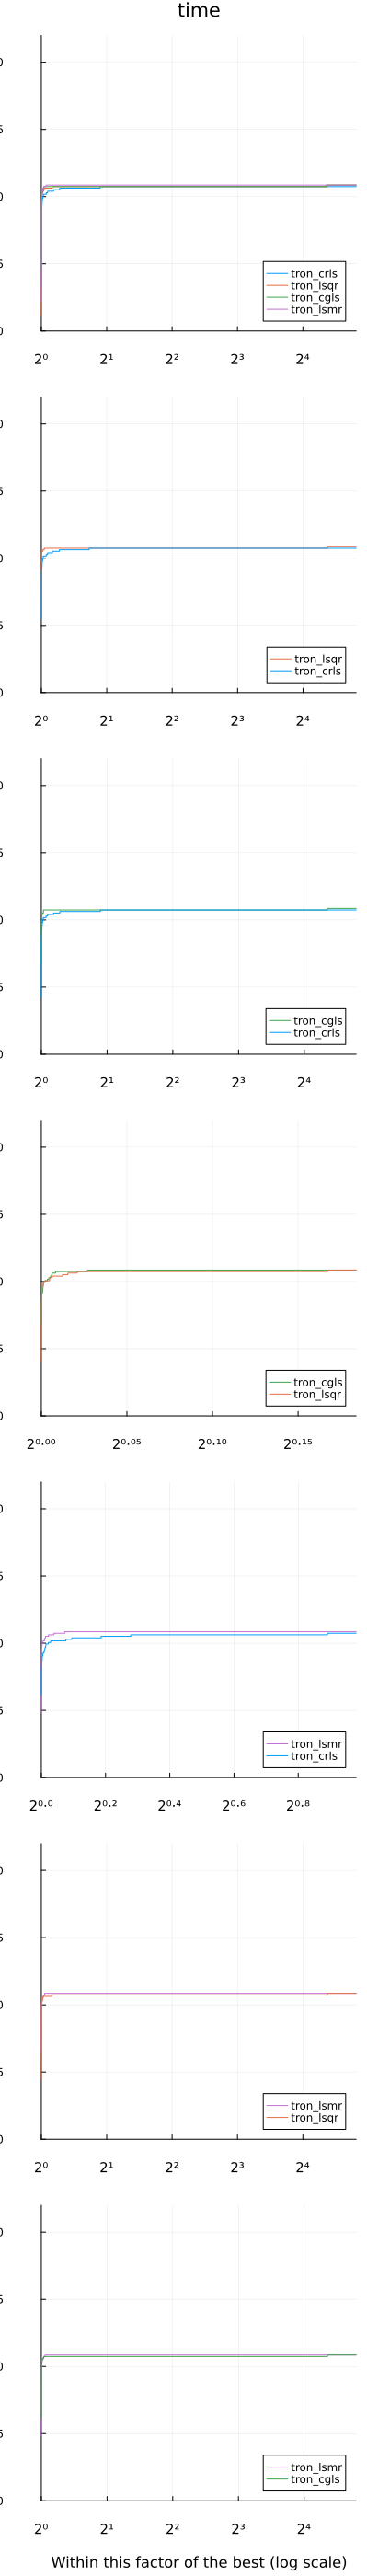

In [18]:
using Plots
gr()
profile_solvers(stats, costs, costnames)